# 机器学习基本流程

## 概要

### 机器学习基本流程

![](./images/ml_pipeline.jpg)

来自： https://blog.csdn.net/hwhsong/article/details/85783258

## 例一：Titanic存活预测

由 Kaggle 主持的[Titanic存活预测比赛](https://www.kaggle.com/c/titanic/)的目标是基于一组描述乘客的变量，例如年龄，性别或乘客在船上的等级，来预测特定乘客是生存或死亡。

涉及的主要库是：

* **Pandas** 用于数据操作和接入（ingestion）
* **Matplotlib** 和 **seaborn** 用于数据可视化
* **Numpy** 用于多维数组计算
* **sklearn** 用于机器学习和预测建模

步骤：

探索性数据分析（EDA） => 特征工程 => 预测模型

## I - 探索性数据分析

开始深入研究数据并建立直觉。

 - 数据提取：加载数据集并查看；
 - 清洗：补充缺失值，数据转换等
 - 绘图：创建图表以发现数据中的相关性和隐藏的关系；
 - 假设：从图表中提出假设。

In [1]:
# 图表居中
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [2]:
# 导入用到的包
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

有两个数据集：训练集和测试集。 我们将使用训练集来构建我们的预测模型，用测试集来对其进行评分。

In [3]:
# 加载数据
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [4]:
print(f"训练集：共有 {train_data.shape[0]} 行数据，每个数据 {train_data.shape[1]} 个维度")
print(f"测试集：共有 {test_data.shape[0]} 行数据，每个数据 {test_data.shape[1]} 个维度")

训练集：共有 891 行数据，每个数据 12 个维度
测试集：共有 418 行数据，每个数据 11 个维度


In [5]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`Survived` 列是 **目标变量**。 如果 `Survived` 为 1，乘客幸免于难，否则他已经死了。这是我们要预测的变量。

其他变量描述了乘客。 它们是 **特征**。

 - `PassengerId`：船上每位旅客的编号
 - `Pclass`：乘客等级。 它有三个可能的值：1，2，3（第一，第二和第三类）
 - `Name`：Passeger的名字
 - `Sex`：性别
 - `Age`：年龄
 - `SibSp`：与乘客一起旅行的兄弟姐妹和配偶的数量
 - `Parch`：与乘客一起旅行的父母和孩子的数量
 - `Ticket`：船票号码
 - `Fare`：票价
 - `Cabin`：船舱号码
 - `Embarked`：这描述了人们登上的泰坦尼克号的三个可能区域。 三个可能的值 S，C，Q

对数字特征进行简单的统计描述

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`count` 变量显示 `Age` 列中缺少177个值。

一种解决方案是用中值年龄填充空值。我们也可以用平均年龄来估算，但中位数对异常值更为稳健。

In [7]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 可视化数据

In [9]:
train_data['Died'] = 1 - train_data['Survived']

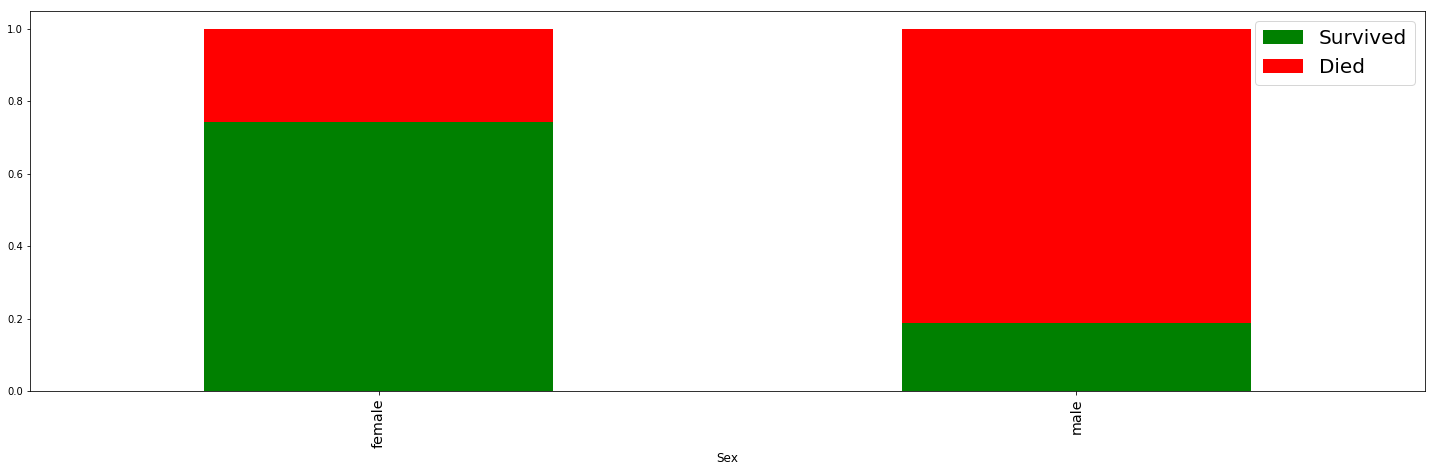

In [10]:
# 性别与生存率关系
train_data.groupby('Sex').agg('mean')[['Survived', 'Died']]\
.plot(kind='bar', figsize=(25, 7), stacked=True, colors=['g', 'r']);

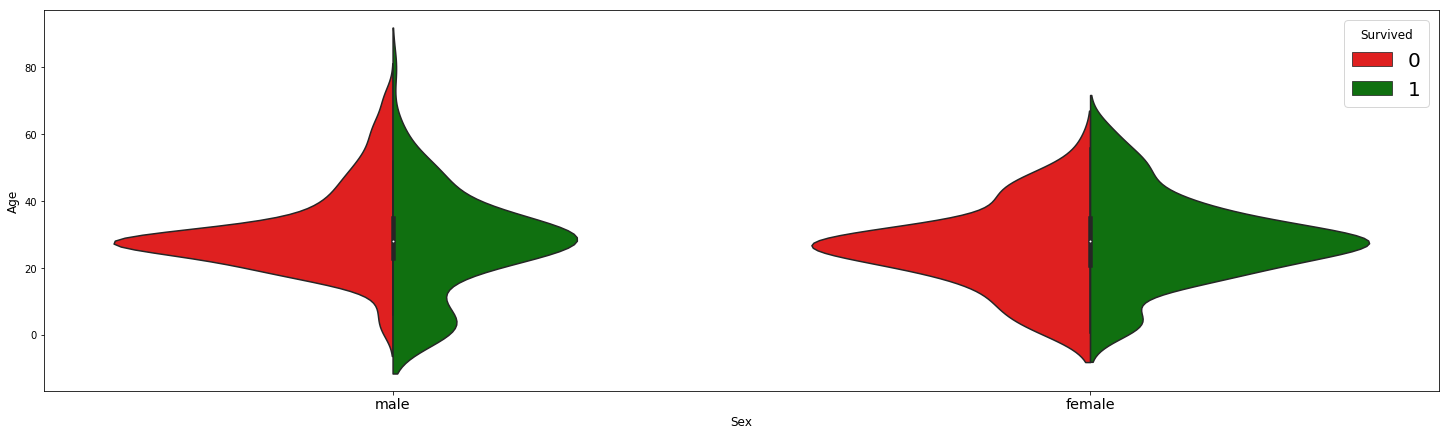

In [12]:
# 年龄与生存率关系
fig = plt.figure(figsize=(25, 7))
sns.violinplot(
    x='Sex', y='Age', 
    hue='Survived', data=train_data, 
    split=True,
    palette={0: "r", 1: "g"}
);

可以看出：

1. 女性的生存率高于男性
2. 男性乘客的生存：
    - 年轻的男性倾向于生存
    - 20至40岁之间的大量乘客死亡
3. 年龄似乎没有对女性生存产生直接影响

以下小提琴情节证实，在遇到威胁的情况下，水手和船长遵守一条旧的行为准则：“**妇女和儿童优先！**”。

![energy](./images/article_1/titanic.jpg)

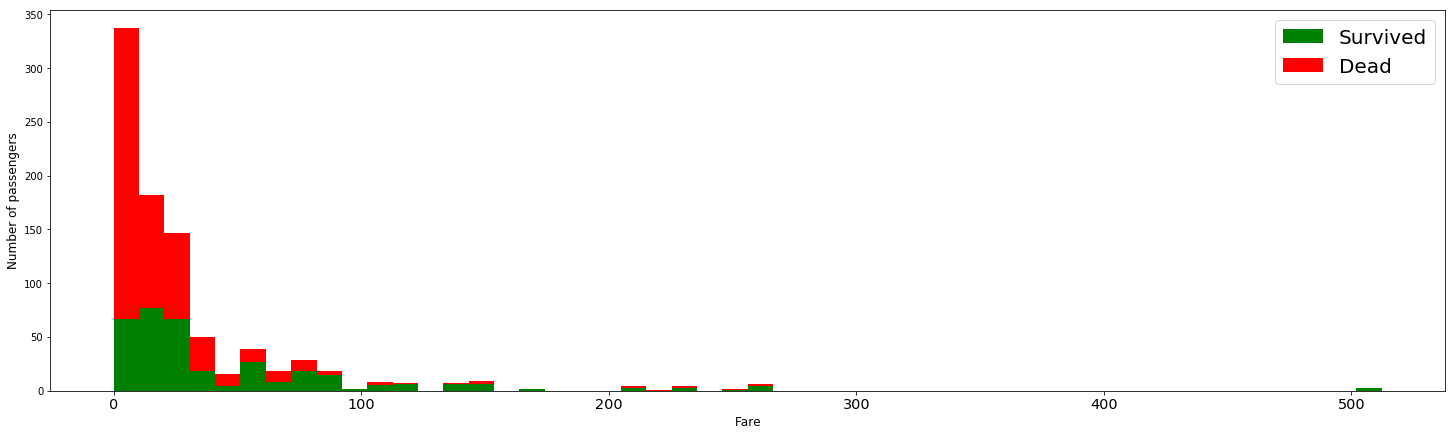

In [13]:
# 乘客的票价
figure = plt.figure(figsize=(25, 7))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

票价较低的乘客更容易死亡。 换句话说，拥有更昂贵门票，因此更重要的社会地位的乘客似乎首先获救。

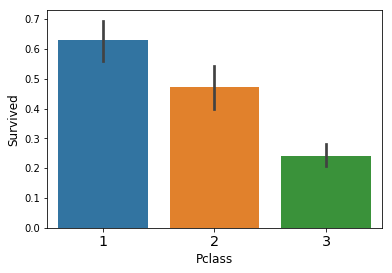

In [14]:
# Pcalss 乘客等级影响生存
sns.barplot(x='Pclass', y='Survived', data=train_data)

将年龄，票价和生存结合在一张图表上。

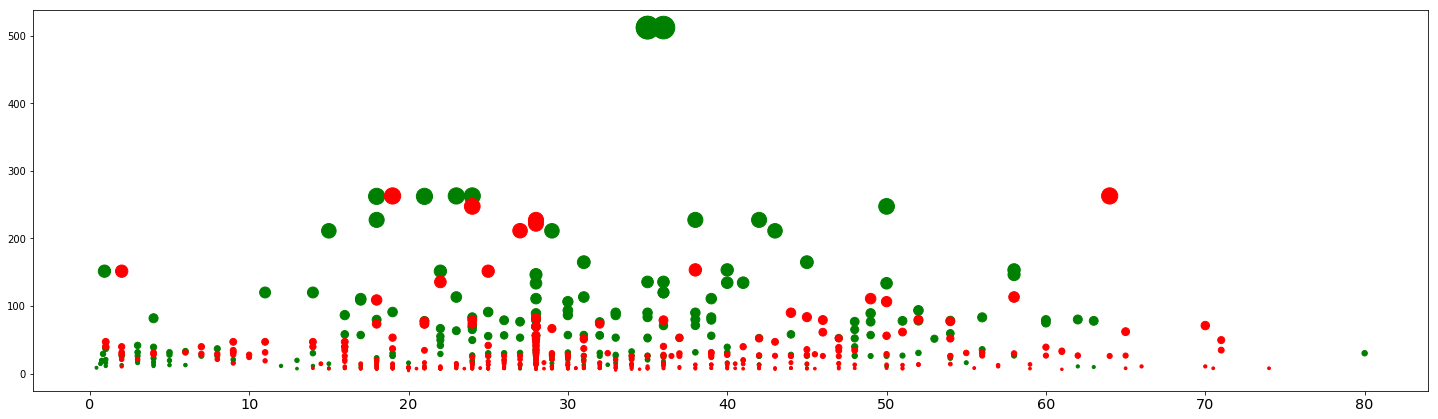

In [15]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'], 
           c='green', s=train_data[train_data['Survived'] == 1]['Fare'])
ax.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'], 
           c='red', s=train_data[train_data['Survived'] == 0]['Fare']);

圆圈的大小与票价成正比。x 轴是年龄，y 轴是票价。

我们可以观察不同的集群：

1. x = 20 和 x = 45 之间的大绿点：票价最高的成人
2. x = 10 和 x = 45 之间的小红点，船上较低级别的成年人
3. x = 0 和 x = 7 之间的小密集点：这些是被保护的孩子

In [16]:
# SibSp 和 Parch
# 家庭的大小
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

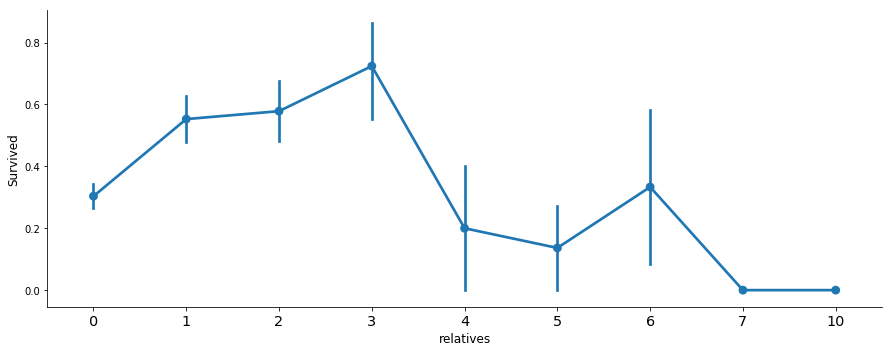

In [17]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, )

- 高：1~3个
- 低：少于一个或者多余3个

## II - 特征工程

处理和转换数据

In [18]:
def status(feature):
    print('Processing', feature, ': ok')

### 加载数据

使用训练集进行特征工程以防止信息泄漏。然后我们将这些变量添加到测试集中。

让我们加载训练集和测试集并将它们合在一起。

In [19]:
def get_combined_data():
    # 读取训练集
    train = pd.read_csv('./data/train.csv')
    
    # 读取测试集
    test = pd.read_csv('./data/test.csv')

    # 抽取并从训练集合中移除目标
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # 合并训练和测试集以为之后的特征工程做准备
    # 同时移除不需要的 PassengerID 列
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [20]:
# 数据的维度
combined = get_combined_data()
print(combined.shape)
print(f"共有 {combined.shape[0]} 行数据，每个数据 {combined.shape[1]} 个维度")

(1309, 10)
共有 1309 行数据，每个数据 10 个维度


训练集和测试集被合并，总行数（1309）是训练集和测试集中行数的总和。

In [21]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 提取乘客称谓

查看乘客姓名：

- Braund, **Mr.** Owen Harris	
- Heikkinen, **Miss.** Laina
- Oliva y Ocana, **Dona.** Fermina
- Peter, **Master.** Michael J

你会注意到每个名字都有一个称谓！这可能是一个简单的小姐（Miss.）或太太（Mrs.），但它有时可能像 Master，Sir 或 Dona 那样更复杂。在这种情况下，我们可以通过简单地解析称谓并提取标题并转换为二进制变量来引入有关社会地位的其他信息。

让我们看看我们将如何在下面的函数中执行此操作。

In [22]:
# 训练集合中的所有称谓
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Mr', 'Master', 'Don', 'Mme', 'Sir', 'the Countess', 'Miss', 'Major', 'Dr', 'Mlle', 'Lady', 'Col', 'Capt', 'Rev', 'Jonkheer', 'Mrs', 'Ms'}


解析名称并提取称谓。 然后将称谓映射到称谓类别上，我们选择：

- Officer
- Royalty 
- Mr
- Mrs
- Miss
- Master

In [24]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # 抽取称谓
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # 映射
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [25]:
combined = get_titles()

Processing Title : ok


In [26]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


查看是否正确

In [27]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


在1305行中确实存在 `NaN` 值。实际上相应的名称是 Oliva y Ocana, **Dona**. Fermina。在训练数据集中没有遇到这个称谓。

### 处理年龄（Age）

在第一部分中看到 `Age` 变量缺少177个值。这是一个很大的数字（约占数据集的13％）。
简单地用平均年龄或中位年龄替换它们可能不是最佳解决方案，因为年龄可能因乘客的类别和类别而不同。

为了理解原因，让我们按性别（Sex），称谓（Title）和乘客类（Pclass）对我们的数据集进行分组，并为每个子集计算中位数年龄。

为了避免测试集中的数据泄漏，我们使用训练集填写训练中的缺失年龄，并且我们使用从训练集计算的值来填充测试集中的年龄。

In [28]:
# 测试集中缺少的年龄数
print(combined.iloc[:891].Age.isnull().sum())

177


In [29]:
# 测试集中缺少的年龄数
print(combined.iloc[891:].Age.isnull().sum())

86


In [30]:
# 分组计算年龄中位数
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [31]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


查看中位年龄如何根据 `Sex`，`Pclass` 和 `Title` 组合在一起。

例如：

 - 如果乘客是女性，则来自 Pclass 1 和来自王室（royalty），中位年龄为40.5岁。
 - 如果乘客是男性，来自 Pclass 3，拥有 Mr 称谓，则年龄中位数为26岁。

让我们创建一个函数，根据这些不同的属性填充 **组合** 中的缺失年龄。

In [32]:
# 根据 `Sex`，`Pclass` 和 `Title` 组合的属性填充 **组合** 中的缺失年龄。
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [33]:
combined = process_age()

Processing age : ok


### 处理名字（Name）

In [35]:
def process_names():
    global combined
    # 删除名字列，已经传唤成 `Title`
    combined.drop('Name', axis=1, inplace=True)
    
    # 进行独热（one-hot）编码
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # 删除称谓列
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

离散特征的编码分为两种情况：

1、离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码

2、离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}

Pandas 中进行离散特征编码：[pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [36]:
combined = process_names()

Processing names : ok


In [37]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### 处理票价（Fare）

通过在训练集上计算的平均票价估算缺失的票价值。

In [38]:
def process_fares():
    global combined
    # 替换空值
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

In [39]:
combined = process_fares()

Processing fare : ok


### 处理登船位置（Embarked）

In [40]:
# 此函数用最常用的 `Embarked` 值替换了两个缺失的 `Embarked` 值。
def process_embarked():
    global combined
    # 使用众数替换
    combined.Embarked.fillna('S', inplace=True)
    # 编码
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

In [41]:
combined = process_embarked()

Processing embarked : ok


In [42]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### 处理船舱位置（Cabin）

In [43]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [44]:
print("train_cabin: ", train_cabin)
print("test_cabin: ", test_cabin)

train_cabin:  {'C', 'F', 'U', 'D', 'A', 'G', 'B', 'T', 'E'}
test_cabin:  {'C', 'F', 'U', 'D', 'A', 'B', 'G', 'E'}


在测试集中没有任何不存在于训练集中的船舱位置字母。

In [45]:
# 此函数将 `NaN` 值替换为 U（表示 _Unknow_ ）。 然后它将每个 `Cabin` 值映射到第一个字母。然后它再次使用虚拟编码对舱位值进行编码。
def process_cabin():
    global combined    
    # 使用 U (for Uknown) 替换空值
    combined.Cabin.fillna('U', inplace=True)
    
    # 映射
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # 编码
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

In [46]:
combined = process_cabin()

Processing cabin : ok


In [47]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### 处理性别（Sex）

将字符串值 male 和 female 分别映射到1和0

In [48]:
def process_sex():
    global combined
    # 编码
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

In [49]:
combined = process_sex()

Processing Sex : ok


### 处理乘客等级（Pclass）

使用虚拟编码对 Pclass（1,2,3）的值进行编码。

In [50]:
def process_pclass():
    
    global combined
    # 分成三类
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # 编码
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [51]:
combined = process_pclass()

Processing Pclass : ok


In [52]:
combined.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### 处理船票号码（Ticket）

In [53]:
# 数据集中不同的船票号码前缀

def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [54]:
print(len(tickets))

37


In [55]:
def process_ticket():
    
    global combined
    
    # 抽取前缀, 如果没有前缀则返回 'XXX' (比如数字票号)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        ticket = list(ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'

    # 独热编码

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [56]:
combined = process_ticket()

Processing Ticket : ok


In [57]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 处理家庭

这部分包括根据家庭的大小创建新变量（大小是我们创建的另一个变量）。

这种新变量的创建是在一个现实的假设下完成的：大家庭聚集在一起，因此他们比单独旅行的人更有可能获救。

In [58]:
def process_family():
    
    global combined
    # 家庭大小（包括旅客）
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # 根据家庭大小增加变量
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

此函数引入了4个新特征：

 -  `FamilySize`：包括乘客（他/她）自己在内的亲属总数。
 -  `Sigleton`：描述 size = 1 的家庭的布尔变量
 -  `SmallFamily`：一个布尔变量，描述 2 <= size <= 4 的家庭
 -  `LargeFamily`：一个布尔变量，描述 5 <size 的家庭

In [59]:
combined = process_family()

Processing family : ok


In [60]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [61]:
print(f"总共特征数量： {combined.shape}")

总共特征数量： (1309, 67)


## III - 模型

训练模型

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [63]:
def recover_train_test():
    global combined
    X_train = combined.iloc[:891]
    y_train = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    
    X_test = combined.iloc[891:]
    
    return X_train, X_test, y_train

In [64]:
X_train, X_test, y_train = recover_train_test()

### 特征选择

到目前为止，我们已经提出了60多个特征。这个数字非常大。

在完成特征工程时，我们通常倾向于通过选择捕获基本特征的“正确”数量的特征来减少维度。

事实上，特征选择带来许多好处：

 - 它减少了数据之间的冗余
 - 它加快了训练过程
 - 它减少过拟合

In [65]:
# 基于树的估算器可用于计算特征重要性，而这些重要性又可用于丢弃不相关的特征。
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [66]:
# 查看每个特征的重要性
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

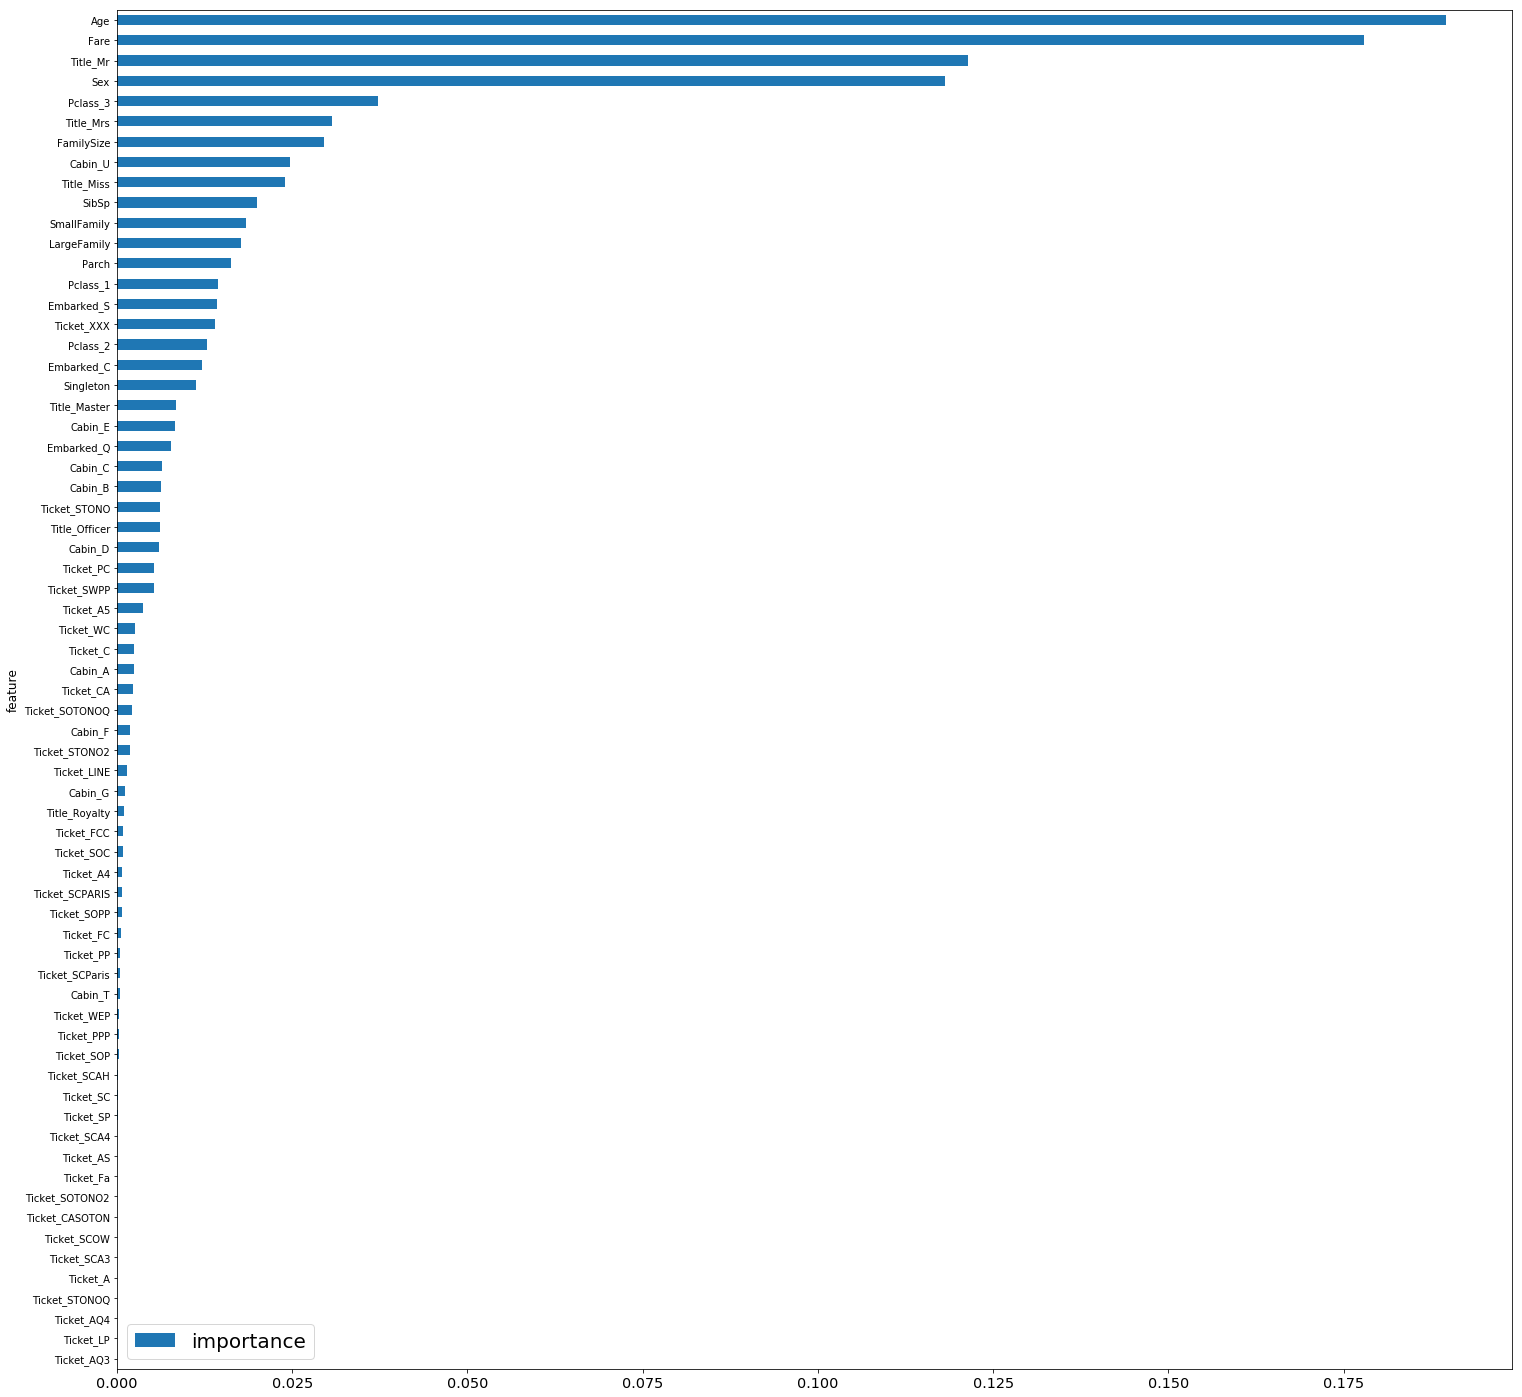

In [67]:
features.plot(kind='barh', figsize=(25, 25))

与 `Title_Mr`，`Age`，`Fare` 和 `Sex` 相关联非常重要。

与 `Passenger_Id` 也有重要的相关性。

现在让我们将我们的训练集和测试集转换为更紧凑的数据集。

In [68]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
print(train_reduced.shape)

(891, 13)


In [69]:
test_reduced = model.transform(X_test)
print(test_reduced.shape)

(418, 13)


### 让我们尝试不同的基础模型

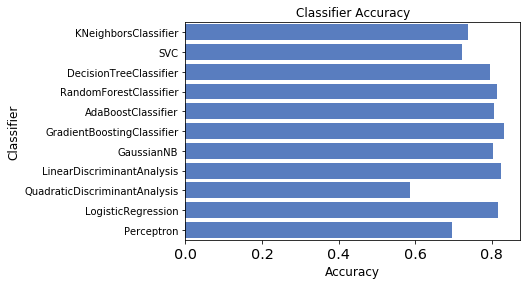

In [70]:
# 默认设置

classifiers = [
    # K近邻(k-Nearest Neighbor，KNN)分类
    KNeighborsClassifier(3),
    # SVM
    SVC(probability=True),
    # 决策树
    DecisionTreeClassifier(),
    # 随机森林（RF）
    RandomForestClassifier(),
    # AdaBoost分类
    AdaBoostClassifier(),
    # 梯度提升树
    GradientBoostingClassifier(),
    # 高斯分布的朴素贝叶斯
    GaussianNB(),
    # 线性判别分析（LDA）
    LinearDiscriminantAnalysis(),
    # 二次判别分析（QDA）
    QuadraticDiscriminantAnalysis(),
    # 逻辑回归
    LogisticRegression(),
    # 感知机器
    Perceptron()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_reduced
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        
        # 模型评估，准确率
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

### 模型评估

- [评估指标](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)
- [模型评估](https://scikit-learn.org/stable/modules/model_evaluation.html)

#### 常见分类模型评估方法

- 混淆矩阵（Confusion Matrix）
- 常用评估指标
  - 准确率（Accuracy，正确率）
  - 错误率（Error Rate)
  - 査准率（Precision，精确率，命中率）
  - 查全率（Recall，召回率，灵敏度：sensitivity)
  - 特异度（specificity)
  - F1 分值（F1 Score, F1 Measure)
- ROC 曲线（Receiver Operating Characteristic Curve，受试者操作特征曲线）
- AUC (Area Under Curve，曲线下面积）
- PRC 曲线（Precious- Recall Curve，精度-召回率曲线）
- 其他：如比较检验、Gain（増益）、Lift（提升）、基尼系数等 9

In [71]:
models = pd.DataFrame({
    'Model': list(acc_dict.keys()),
    'Score': list(acc_dict.values())
})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,GradientBoostingClassifier,0.833333
7,LinearDiscriminantAnalysis,0.824444
9,LogisticRegression,0.815556
3,RandomForestClassifier,0.814444
4,AdaBoostClassifier,0.805556
6,GaussianNB,0.803333
2,DecisionTreeClassifier,0.795556
0,KNeighborsClassifier,0.737778
1,SVC,0.723333
10,Perceptron,0.695556


### 超参数调整

正如建模部分的开头所提到的，我们将使用随机森林模型。它可能不是这项任务的最佳模型，但我们将展示如何调整。这项工作可以应用于不同的模型。

随机森林非常方便。然而，它们会带有一些参数进行调整，以便为预测任务获得最佳模型。

要了解有关随机森林的更多信息，请参阅此 [链接](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/)。

此外，我们将使用全部训练集。

In [72]:
# 3x2x3x3x3x2=324
parameter_grid = {
    # 树的最大深度
    'max_depth' : [4, 6, 8],
    # 决策树的个数，越多越好，但是性能就会越差
    'n_estimators': [50, 10],
    # 选择最适属性时划分的特征不能超过此值
    'max_features': ['sqrt', 'auto', 'log2'],
    # 根据属性划分节点时，每个划分最少的样本数
    'min_samples_split': [2, 3, 10],
    # 叶子节点最少的样本数
    'min_samples_leaf': [1, 3, 10],
    # 是否有放回的采样
    'bootstrap': [True, False],
}
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

# 网格搜索
grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           verbose=1
                          )

grid_search.fit(X, y)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8372615039281706
Best parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:   58.2s finished


输出结果：

```shell
Best score: 0.8372615039281706
Best parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
```

In [73]:
# 训练最好模型
parameters = {
    'bootstrap': False,
    'max_depth': 6,
    'max_features': 'log2',
    'min_samples_leaf': 10,
    'min_samples_split': 3,
    'n_estimators': 10
}

model = RandomForestClassifier(**parameters)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
# 判断是否过拟合

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    画出data在某模型上的learning curve.

    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/usr/local/miniconda3/envs/cnnsql/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<Figure size 432x288 with 0 Axes>

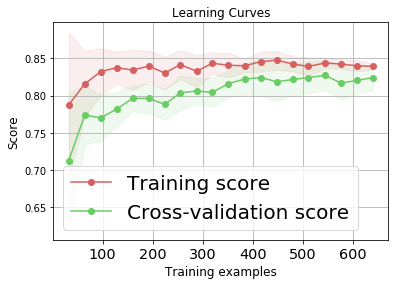

In [75]:
plt.clf()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model, "Learning Curves", X_train, y_train, train_sizes=np.linspace(.05, 1., 20), cv=cv, n_jobs=4)


In [76]:
train_predictions = model.predict(X_test)
# 模型评估，准确率
acc = accuracy_score(y_test, train_predictions)
print(acc)

0.8555555555555555


## 模型部署

1. 模型保存和加载：
    - `pickle.dump`, `pickle.load`
    - `joblib.dump`, `joblib.load`

2. 部署上线

In [79]:
import pickle
with open('model_titanic_v1.pkl', 'wb') as file:
    pickle.dump(model, file)

### 实验

In [77]:
import json
import requests

header = {
    'Content-Type': 'application/json',
    'Accept': 'application/json'}

# TODO: 读取test数据, 按上边的流程处理一遍
# df = pd.read_csv('./test.csv', encoding="utf-8")
# df = df.head()

data = {
    "person": list(X_test[0])
}
print(data)

{'person': [1.0, 46.0, 0.0, 0.0, 26.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]}


In [80]:
resp = requests.post("http://127.0.0.1:5000/predict",data = json.dumps(data),headers= header)
print(resp.json())

{'predictions': 0}


### 参考

- [ML笔记 - 机器学习的基本流程](https://blog.csdn.net/hwhsong/article/details/85783258)
- [How to score 0.8134 in Titanic Kaggle Challenge](https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)

## 例二：手写数字识别

### 数据集 MNIST 简介

MNIST 数据集是由 Yann LeCun 等前辈创建的数据集，是常用的用于机器学习手写数字识别的训练数据集。数据集中的手写数字图片来源于扫描文档（由 National Institute of Standards and Technology，NIST 提供），后经过标准化修改处理而用于机器训练学习。其中训练集数据有60,000张图片，测试集数据有10,0000张图片。每张图片的大小为28x28，共784像素。一般通过深度学网络训练，识别结果的错误率可以降到1%左右，如果是通过大规模的深度网络训练，错误率已经可以降到0.21%（2013）。

![](./images/mnist.jpg)

In [81]:
# 加载所用到的库
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

# 固定随机种子，可重复
np.random.seed(42)

Using TensorFlow backend.


### 查看数据

In [82]:
# 输入图片的维度
img_rows, img_cols = 28, 28

# 拆分数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [83]:
# 数据维度
print("训练图片：", x_train.shape)
print("训练图片标签：", y_train.shape)
print("测试图片：", x_test.shape)
print("测试图片标签：", y_test.shape)

训练图片： (60000, 28, 28)
训练图片标签： (60000,)
测试图片： (10000, 28, 28)
测试图片标签： (10000,)


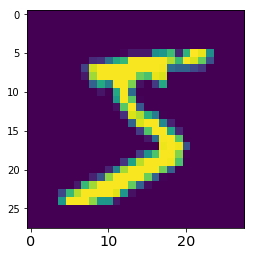

In [84]:
plt.imshow(x_train[0])

In [85]:
print(y_train[0])

5


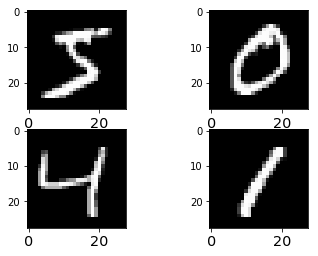

In [86]:
# 绘制4张灰度图
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### 预处理图像数据

图像不仅有“宽度”和“高度”，而且还有深度。

对于彩色图片，图像的深度为3，即有“红R，绿G，蓝B”3个通道；

对于像MNIST这样的灰度图片，其图像深度仅为1：

![](./images/mnist_channels.jpg)

所以，我们数据集的形态，应该从

   **(样本数量, 图片宽度, 图片高度)**

转换为 

   **(样本数量, <span style="color: #ff0000;">图片深度</span>, 图片宽度, 图片高度)**

In [87]:
# 10个分类
num_classes = 10

# 输入数据维度
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 转为 float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 将灰度像素值（0到255之间）转换为0到1之间的值，提高训练效果
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [89]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### 预处理分类标签

![](./images/mnist_one_hot.png)

In [90]:
# 将目标输出的数据格式转换为“One-hot”表示形式
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [91]:
print(y_train.shape)

(60000, 10)


### 定义模型结构

In [92]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### 训练和评估

In [100]:
# 表示一批处理128个样本
batch_size = 128
# 表示12个周期，每个周期都把全部60,000个样本遍历一遍
epochs = 12

# 目标是要使得误差损失（categorical_crossentropy）尽可能小
# 使用的优化方法是：Adadelta，还有其他，比如 SGD, Adam
# 使用“准确率：accuracy”来评估模型的预测效果
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0374 - acc: 0.9889 - val_loss: 0.0246 - val_acc: 0.9916
Epoch 2/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0340 - acc: 0.9897 - val_loss: 0.0260 - val_acc: 0.9912
Epoch 3/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0313 - acc: 0.9903 - val_loss: 0.0303 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0295 - acc: 0.9909 - val_loss: 0.0272 - val_acc: 0.9908
Epoch 5/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0265 - acc: 0.9915 - val_loss: 0.0268 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0260 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0252 - acc: 0.9923 - val_loss: 0.0259 - 

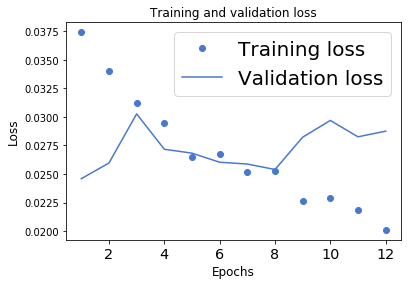

In [104]:
# 绘制训练损失和验证损失

plt.clf() # 清空图像
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

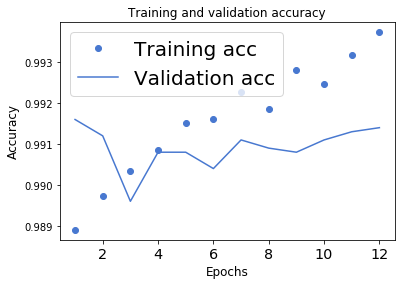

In [105]:
# 绘制训练精度和验证精度

plt.clf() # 清空图像
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
# 评估
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028752654091098295
Test accuracy: 0.9914


### 模型微调

1. 调整模型结构
2. 调整损失函数
3. 调整优化方法参数

In [ ]:
# 模型保存
from keras import backend as K                                                                                                               
import tensorflow as tf      
                                                                                                                                        
signature = tf.saved_model.signature_def_utils.predict_signature_def(                                                                        
    inputs={'seq': model.input}, outputs={'type': model.output})                                                                         
                                                                                                                                             
builder = tf.saved_model.builder.SavedModelBuilder('./model_mnist_v1/')                                                                    
builder.add_meta_graph_and_variables(                                                                                                        
    sess=K.get_session(),                                                                                                                    
    tags=[tf.saved_model.tag_constants.SERVING],                                                                                             
    signature_def_map={                                                                                                                      
        tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:                                                                
            signature                                                                                                                        
    })                                                                                                                                       
builder.save()

### 部署上线

1. model.save, load_model
2. TensorFlow Serving

加载模型：

```shell
docker run -d -p :8500:8500 -p :8501:8501 --name tfserving --mount type=bind,source=/path/to/mnist,target=/models/mnist -e MODEL_NAME=mnist -t tensorflow/serving:1.12.3
```

In [94]:
!curl http://localhost:8501/v1/models/mnist
# !curl http://localhost:8501/v1/models/mnist/versions/111/metadata

{
 "model_version_status": [
  {
   "version": "111",
   "state": "AVAILABLE",
   "status": {
    "error_code": "OK",
    "error_message": ""
   }
  }
 ]
}


In [95]:
print(x_test[0].shape)

(28, 28, 1)


### 使用 GRPC

In [97]:
import grpc
from tensorflow.contrib.util import make_tensor_proto
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

# grpc
channel = grpc.insecure_channel('{host}:{port}'.format(
    host='127.0.0.1', port='8500'))
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

def request_grpc(data):
    """请求模型tf serving服务器获取结果

    :param data: 数据序列
    :type data: np.array
    :return: [分类 置信度]
    :rtype: [int float]
    """
    request = predict_pb2.PredictRequest()
    request.model_spec.name = "mnist"
    request.model_spec.signature_name = "serving_default"

    request.inputs['seq'].CopyFrom(make_tensor_proto(data, shape=data.shape))
    # 同步
    result = stub.Predict(request, 10.0)
    prediction = np.array(result.outputs["type"].float_val)
    result_class = prediction.argmax(axis=-1)
    result_confidence = prediction[result_class]
    return [result_class, result_confidence]

In [98]:
request_grpc(np.array(x_test[:1]))

[7, 1.0]

### 使用 REST API

In [96]:
import json
import requests
data = json.dumps({"signature_name": "serving_default", "instances": x_test[:1].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mnist:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print("Return:", predictions)
predictions = np.array(predictions)
classes = predictions.argmax(axis=-1)[0]
print("Result:", [classes, predictions[0][classes]])

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}
Return: [[1.56809e-10, 1.2648e-09, 2.77792e-09, 2.40521e-09, 1.16565e-12, 7.19094e-12, 4.20379e-15, 1.0, 2.27681e-12, 2.00064e-09]]
Result: [7, 1.0]


## 参考

1. [CNN 实现基于 MNIST 数据集的手写识别](http://yangguang2009.github.io/2017/01/01/deeplearning/handwritten-digit-recognition-using-CNN-with-keras/)
2. [Train and serve a TensorFlow model with TensorFlow Serving](https://www.tensorflow.org/tfx/serving/tutorials/Serving_REST_simple)

## 总结

数据科学管道的基本要点：

 - 数据探索和可视化：制定假设的第一步
 - 数据清理
 - 特征工程
 - 特征选择
 - 模型训练
 - 超参数调整
 - 模型保存和使用

## 问题

1. 如何用机器学习实现手写数字识别？

### 参考

- [Keras Example](https://keras.io/examples/mnist_cnn/)
- [CNN 实现基于 MNIST 数据集的手写识别](http://yangguang2009.github.io/2017/01/01/deeplearning/handwritten-digit-recognition-using-CNN-with-keras/)
- [keras教程：卷积神经网络（CNNs）终极入门指南](http://www.aiportal.net/cnns/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C-%E5%9B%BE%E5%83%8F%E8%AF%86%E5%88%AB-keras%E4%BB%A3%E7%A0%81)

## 资料推荐

### 课程

1. [机器学习速成课程](https://developers.google.com/machine-learning/crash-course/?hl=zh-cn)
2. [吴恩达机器学习](https://study.163.com/course/introduction/1004570029.htm)
    - [课程笔记](https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes)
3. [吴恩达深度学习](https://mooc.study.163.com/smartSpec/detail/1001319001.htm)
    - [课程笔记](https://github.com/fengdu78/deeplearning_ai_books)
4. 其他：fastai, 斯坦福 CS231n，CS224n，台大李宏毅-机器学习，李宏毅-Deep and Structured的机器学习

### 社区

1. [Kaggle社区](https://www.kaggle.com/)
2. [github](https://www.github.com)
3. 在 [arXiv](https://arxiv.org/) 阅读最新进展

### 书籍：

1. **[Python深度学习](https://book.douban.com/subject/30293801/) -- Keras之父，现任Google人工智能研究员的弗朗索瓦•肖莱**
2. [Scikit-Learn与TensorFlow机器学习实用指南](https://book.douban.com/subject/26840215/)
3. [深度学习入门──基于Python的理论与实现](https://book.douban.com/subject/30270959/)

理论：

4. [机器学习──周志华](https://book.douban.com/subject/26708119/)
5. [深度学习](https://book.douban.com/subject/27087503/)
6. [统计学习方法（第2版）──李航](https://book.douban.com/subject/33437381/)